CV on training set data to select the penalty parameter 

but compute the other parameters using the entire set of data

plot Squared error against degree of freedom 

rss = sum((y_pred-data['y'])**2)

In [50]:
# Grid Search for Lasso tuning
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error  #  'neg_mean_squared_error'
from sklearn.metrics import r2_score
# load the diabetes datasets
dataset = datasets.load_diabetes()

# prepare a range of alpha values to test
param_grid = {
#               "alpha":[0, 1, 0.1]
                "alpha": np.arange(0, 1, 0.01)
             }

# create and fit a lasso regression model, testing each alpha
lasso = Lasso()
# This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function
# or scoring must be passed.

#### would still want to use mean squared error instead of r^2
grid = GridSearchCV(estimator = lasso, scoring = 'r2', param_grid = param_grid )
grid.fit(dataset.data, dataset.target)
print(grid)


# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression 

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 0.  ,  0.01, ...,  0.98,  0.99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)
0.48924897208
0.01


In [51]:
# scoring against the alpha values 
import matplotlib.pyplot as plt
%matplotlib inline

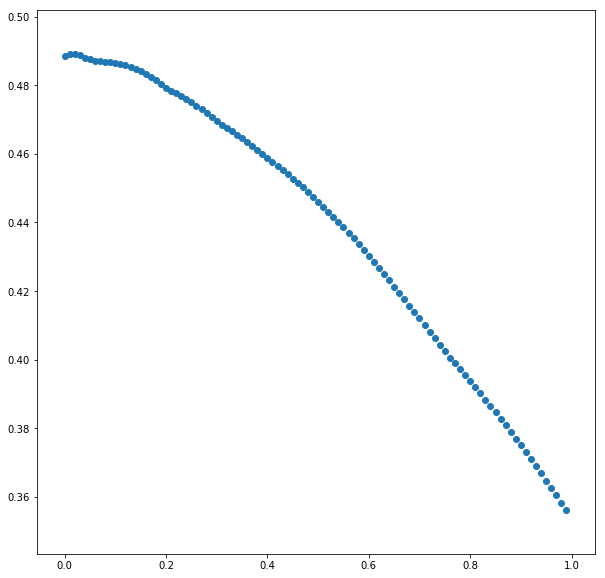

In [52]:
fig = plt.figure(figsize = (10, 10))

scores = grid.cv_results_['mean_test_score']
alphas = np.arange(0, 1, 0.01)
plt.scatter(alphas, scores)

plt.show()